#  BANK MARKETING DATASET FOR LOGISTIC REGRESSION

####The goal is to predict whether the client will subscribe to a term deposit (yes or no).

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [21]:
data=pd.read_csv(r'C:\\Users\\aelec\Bank_Marketing_Sample.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,admin.,single,secondary,no,1500,yes,no,cellular,5,may,100,1,999,0,nonexistent,0
1,40,technician,married,tertiary,no,2500,yes,no,cellular,10,jun,200,2,999,0,nonexistent,1
2,35,services,single,primary,no,500,no,no,telephone,7,jul,150,1,999,0,nonexistent,0
3,50,management,married,tertiary,no,3500,yes,yes,cellular,12,aug,300,3,999,0,nonexistent,1
4,28,admin.,single,secondary,no,1000,no,no,cellular,8,may,120,1,999,0,nonexistent,0
5,42,services,married,primary,no,1200,no,no,telephone,9,jun,180,2,999,0,nonexistent,0
6,33,technician,single,secondary,no,600,yes,yes,cellular,6,jul,140,1,999,0,nonexistent,1
7,47,management,married,tertiary,no,2700,yes,no,cellular,15,aug,210,3,999,0,nonexistent,1
8,52,admin.,divorced,secondary,no,2000,no,no,telephone,11,may,190,2,999,0,nonexistent,0
9,31,technician,single,primary,no,700,no,no,cellular,13,jun,160,1,999,0,nonexistent,0


In [3]:
pwd

'C:\\Users\\aelec'

In [23]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,admin.,single,secondary,no,1500,yes,no,cellular,5,may,100,1,999,0,nonexistent,0
1,40,technician,married,tertiary,no,2500,yes,no,cellular,10,jun,200,2,999,0,nonexistent,1
2,35,services,single,primary,no,500,no,no,telephone,7,jul,150,1,999,0,nonexistent,0
3,50,management,married,tertiary,no,3500,yes,yes,cellular,12,aug,300,3,999,0,nonexistent,1
4,28,admin.,single,secondary,no,1000,no,no,cellular,8,may,120,1,999,0,nonexistent,0


In [25]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
5,42,services,married,primary,no,1200,no,no,telephone,9,jun,180,2,999,0,nonexistent,0
6,33,technician,single,secondary,no,600,yes,yes,cellular,6,jul,140,1,999,0,nonexistent,1
7,47,management,married,tertiary,no,2700,yes,no,cellular,15,aug,210,3,999,0,nonexistent,1
8,52,admin.,divorced,secondary,no,2000,no,no,telephone,11,may,190,2,999,0,nonexistent,0
9,31,technician,single,primary,no,700,no,no,cellular,13,jun,160,1,999,0,nonexistent,0


In [27]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.000000
mean,38.80000,1620.000000,9.600000,175.000000,1.700000,999.0,0.0,0.400000
std,8.70249,1018.495623,3.204164,56.223759,0.823273,0.0,0.0,0.516398
min,28.00000,500.000000,5.000000,100.000000,1.000000,999.0,0.0,0.000000
25%,31.50000,775.000000,7.250000,142.500000,1.000000,999.0,0.0,0.000000
50%,37.50000,1350.000000,9.500000,170.000000,1.500000,999.0,0.0,0.000000
75%,45.75000,2375.000000,11.750000,197.500000,2.000000,999.0,0.0,1.000000
max,52.00000,3500.000000,15.000000,300.000000,3.000000,999.0,0.0,1.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10 non-null     int64 
 1   job        10 non-null     object
 2   marital    10 non-null     object
 3   education  10 non-null     object
 4   default    10 non-null     object
 5   balance    10 non-null     int64 
 6   housing    10 non-null     object
 7   loan       10 non-null     object
 8   contact    10 non-null     object
 9   day        10 non-null     int64 
 10  month      10 non-null     object
 11  duration   10 non-null     int64 
 12  campaign   10 non-null     int64 
 13  pdays      10 non-null     int64 
 14  previous   10 non-null     int64 
 15  poutcome   10 non-null     object
 16  y          10 non-null     int64 
dtypes: int64(8), object(9)
memory usage: 1.5+ KB


In [31]:
data.shape

(10, 17)

In [33]:
data.size

170

In [ ]:
sns.countplot(x='Pregnancies',data=data)


In [37]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,admin.,single,secondary,no,1500,yes,no,cellular,5,may,100,1,999,0,nonexistent,0
1,40,technician,married,tertiary,no,2500,yes,no,cellular,10,jun,200,2,999,0,nonexistent,1
2,35,services,single,primary,no,500,no,no,telephone,7,jul,150,1,999,0,nonexistent,0
3,50,management,married,tertiary,no,3500,yes,yes,cellular,12,aug,300,3,999,0,nonexistent,1
4,28,admin.,single,secondary,no,1000,no,no,cellular,8,may,120,1,999,0,nonexistent,0
5,42,services,married,primary,no,1200,no,no,telephone,9,jun,180,2,999,0,nonexistent,0
6,33,technician,single,secondary,no,600,yes,yes,cellular,6,jul,140,1,999,0,nonexistent,1
7,47,management,married,tertiary,no,2700,yes,no,cellular,15,aug,210,3,999,0,nonexistent,1
8,52,admin.,divorced,secondary,no,2000,no,no,telephone,11,may,190,2,999,0,nonexistent,0
9,31,technician,single,primary,no,700,no,no,cellular,13,jun,160,1,999,0,nonexistent,0


In [47]:
data

,age,balance,day,duration,campaign,pdays,previous,y,job_management,job_services,...,marital_married,marital_single,education_secondary,education_tertiary,housing_yes,loan_yes,contact_telephone,month_jul,month_jun,month_may
0,30,1500,5,100,1,999,0,0,False,False,...,False,True,True,False,True,False,False,False,False,True
1,40,2500,10,200,2,999,0,1,False,False,...,True,False,False,True,True,False,False,False,True,False
2,35,500,7,150,1,999,0,0,False,True,...,False,True,False,False,False,False,True,True,False,False
3,50,3500,12,300,3,999,0,1,True,False,...,True,False,False,True,True,True,False,False,False,False
4,28,1000,8,120,1,999,0,0,False,False,...,False,True,True,False,False,False,False,False,False,True
5,42,1200,9,180,2,999,0,0,False,True,...,True,False,False,False,False,False,True,False,True,False
6,33,600,6,140,1,999,0,1,False,False,...,False,True,True,False,True,True,False,True,False,False
7,47,2700,15,210,3,999,0,1,True,False,...,True,False,False,True,True,False,False,False,False,False
8,52,2000,11,190,2,999,0,0,False,False,...,False,False,True,False,False,False,True,False,False,True
9,31,700,13,160,1,999,0,0,False,False,...,False,True,False,False,False,False,False,False,True,False


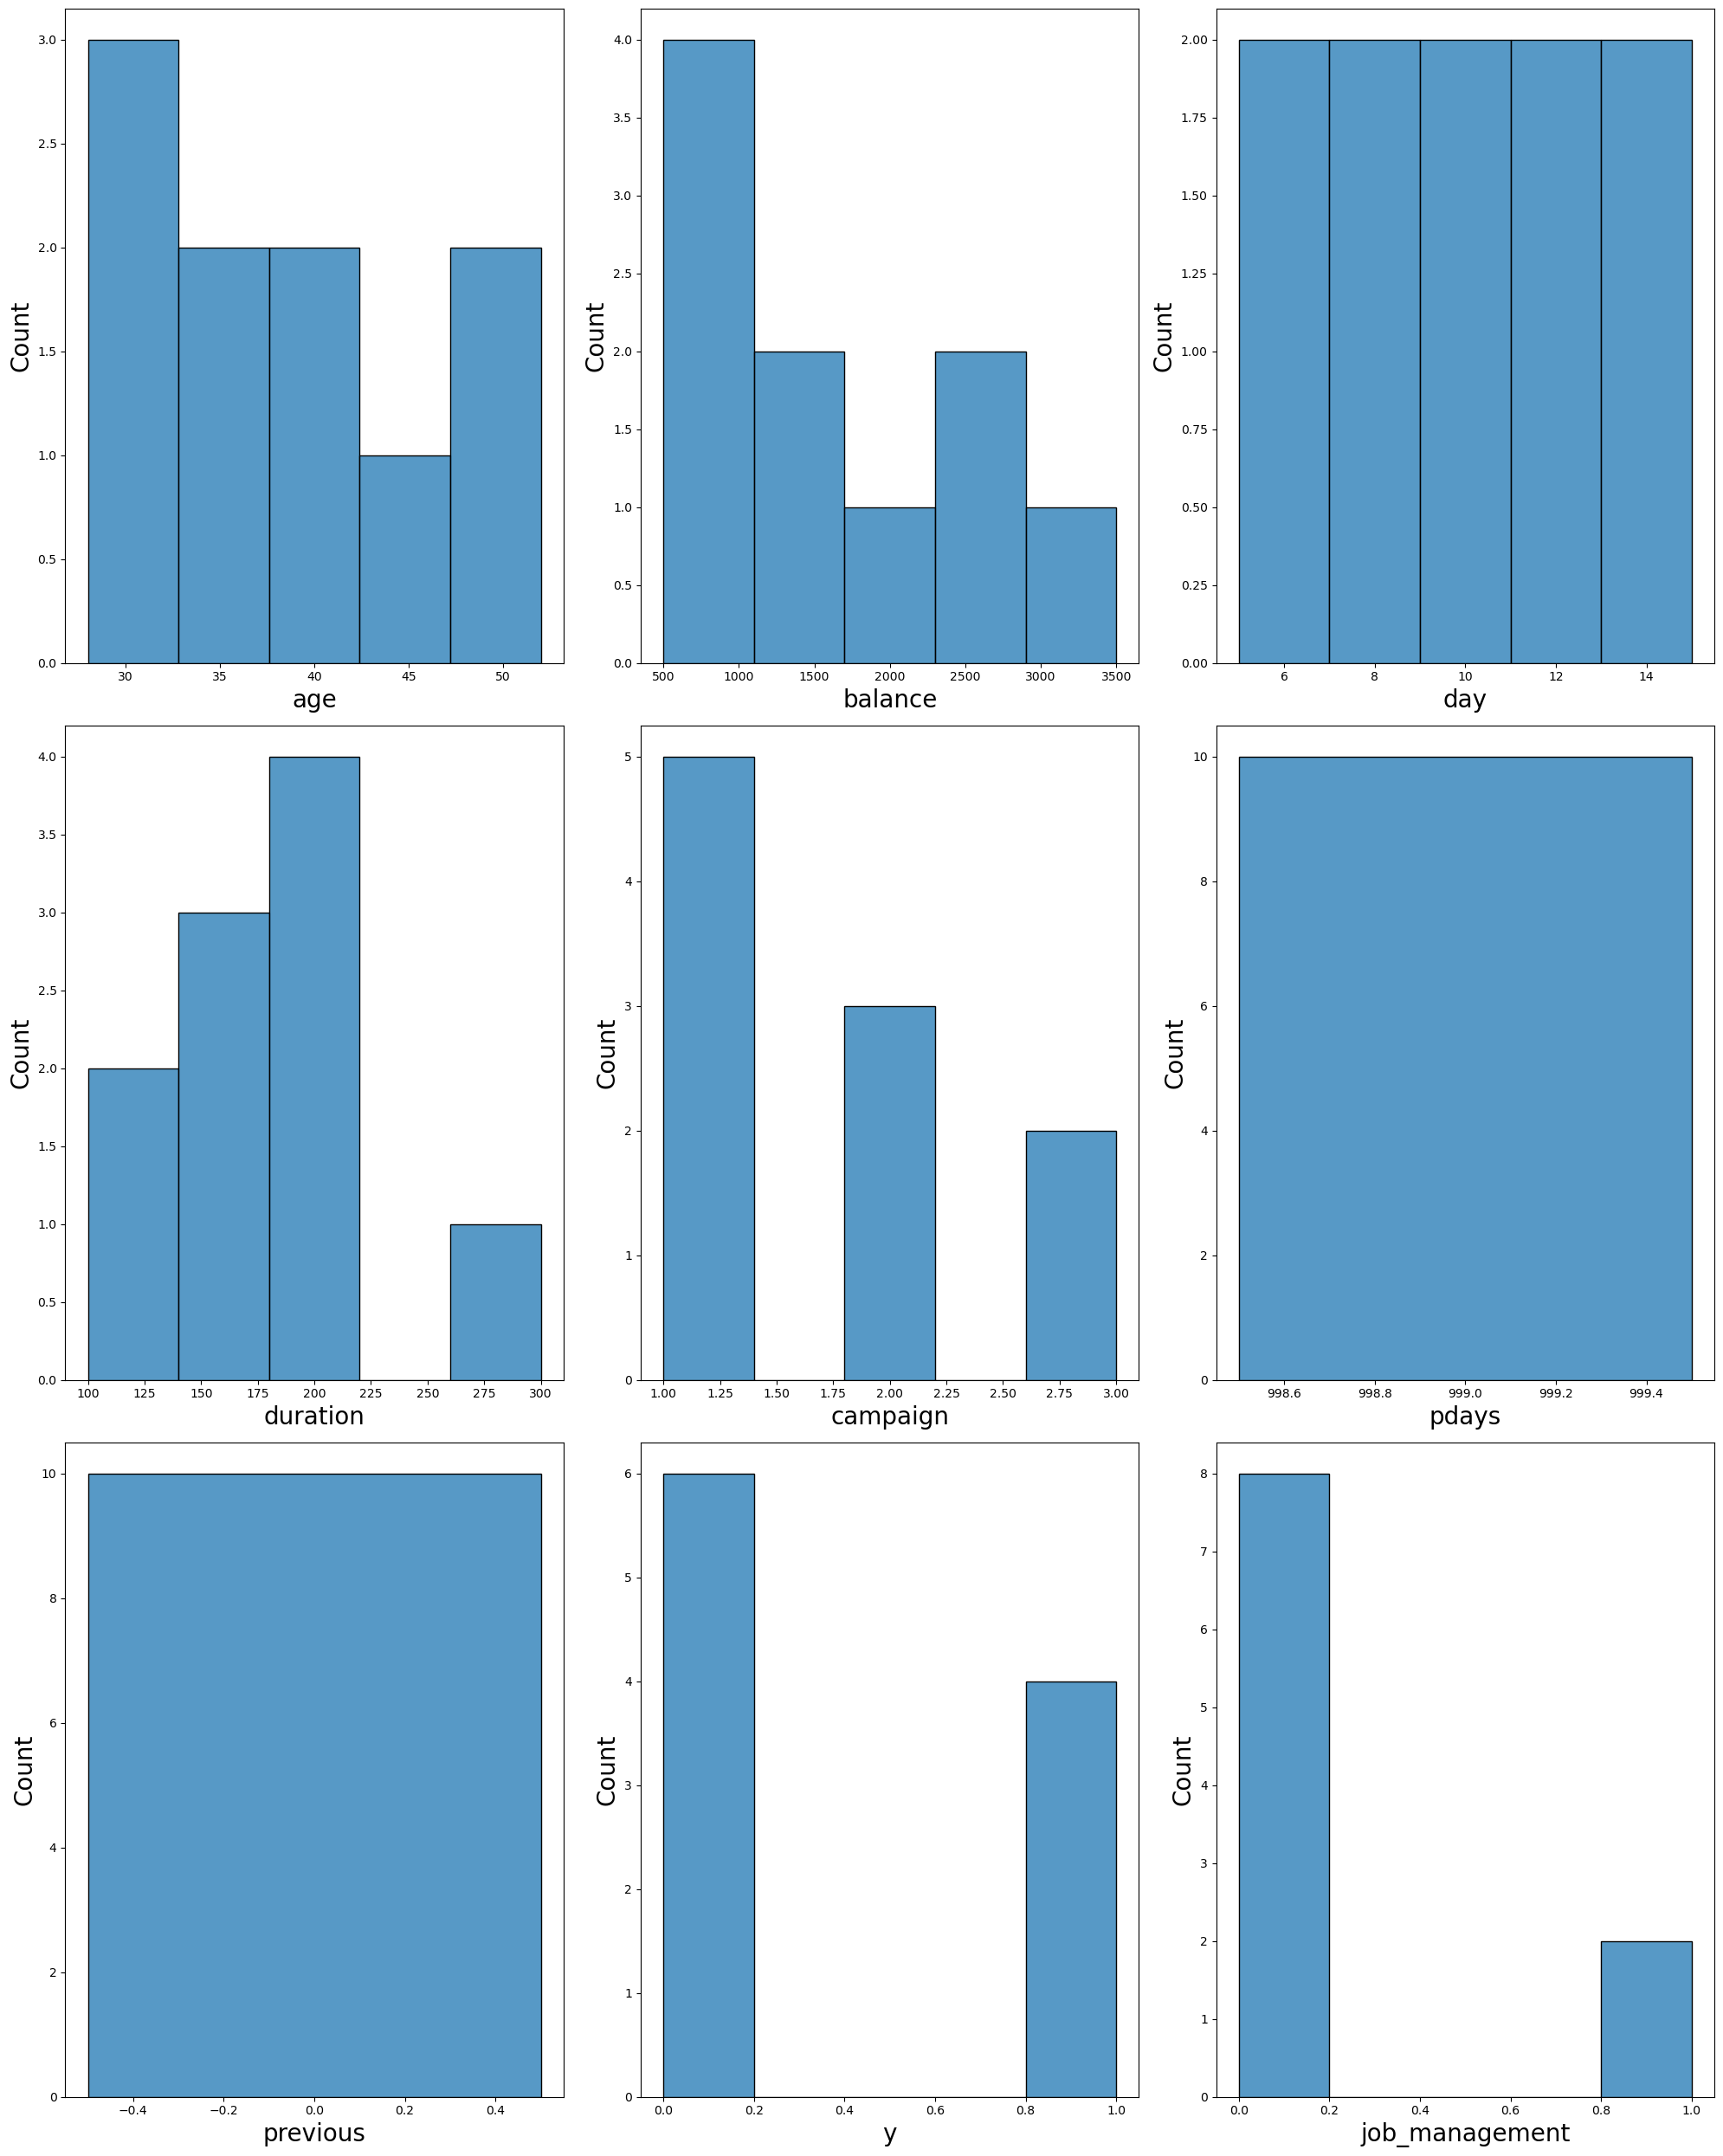

In [43]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [ ]:
a